# Estatística suficiente 

Nesse notebook, faremos alguns poucos experimentos para ilustrar fatos verificados no capítulo de Estatística Suficiente.

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from tqdm import tqdm

## Amostrando!

Seja $X_1, \dots, X_n$ uma amostra aleatória de uma distribuição $P_{\theta}$. 
Seja $T(X)$ uma estatística suficiente. 
Sabemos que $\mathbb{P}(X_1, \dots, X_n | T(X) = t)$ independe de $\theta$.
Suponha então que temos dois experimentadores. 
O primeiro captura todas as amostras e passa para o segundo experimentador apenas o valor de $T(X)$ para economizar!
Vamos verificar que o segundo experimentador consegue, agora, obter amostras fake da amostra original.

Vamos começar com um exemplo simples: $X_1, \dots, X_n \sim \operatorname{Normal}(\mu, 1)$. Uma estatística suficiente (mínima, inclusive) nesse caso é $\bar{X} = n^{-1}(X_1 + \dots + X_n)$.

Sabemos que $\bar{X} \sim \operatorname{Normal}(\mu, n^{-1})$. Assim, 
$$
f(X_1, \dots, X_n | \bar{X} = t) = \frac{(2\pi)^{-n/2}\exp\{-1/2 \sum_{i=1}^n(x_i-\mu)^2\}}{(2\pi n^{-1})^{-1/2}\exp\{-n/2(t-\mu)^2\}} \propto \exp\left\{-\frac{1}{2}(S_x^2 - 2\mu n t + n\mu^2 - nt^2 + 2\mu n t - n\mu^2).\right\} = \exp\left\{-\frac{1}{2}\sum_{i=1}^n (x_i^2 - t^2)\right\},
$$
em que $S_x^2 = \sum_{i=1}^n x_i^2$ e $X_n = nt - \sum_{i=1}^{n-1} X_i$.

Note que podemos escrever 
$$
f(X_1, \dots, X_{n-1} | \bar{X} = t) \propto \exp\left\{nt^2/2\right\}\exp\left\{-\frac{1}{2}\left[\sum_{i=1}^{n-1} x_i^2 + \left(nt - \sum_{i=1}^{n-1} x_i\right)^2 \right]\right\} = \exp\left\{nt^2/2\right\}\exp\left\{-\frac{1}{2}\left[\sum_{i=1}^{n-1} x_i^2 + n^2t^2 - 2nt\sum_{i=1}^{n-1} x_i + \left(\sum_{i=1}^{n-1} x_i\right)^2\right]\right\}
$$

Assim, 
$$
\begin{split}
f(X_1, \dots, X_{n-1} | \bar{X} = t) &\propto \exp\left\{nt^2/2\right\}\exp\left\{-\frac{1}{2}\left[\sum_{i=1}^{n-1} (x_i^2 - 2nt x_i + nt^2) +nt^2 + \left(\sum_{i=1}^{n-1} x_i\right)^2\right]\right\} \\
&= \exp\left\{-\frac{1}{2}\left[\sum_{i=1}^{n-1} (x_i^2 - 2t x_i + t^2) - 2(n-1)t\sum_{i=1}^{n-1} x_i + (n-1)^2t^2 + \left(\sum_{i=1}^{n-1} x_i\right)^2\right]\right\} \\
&= \exp\left\{-\frac{1}{2}\left[\sum_{i=1}^{n-1} (x_i - t)^2 + \left(\sum_{i=1}^{n-1} (x_i - t)\right)^2 \right]\right\} \\
&= \exp\left\{-\frac{1}{2}\left[\sum_{i=1}^{n-1} (x_i - t)^2 + \sum_{j=1}^{n-1} \sum_{i=1}^{n-1} (x_j-t)(x_i - t) \right]\right\}
\end{split}
$$

Com isso, observamos que $X_1, \dots, X_n | \bar{X} = t$ tem distribuição Normal Multivariada com $\mathbb{E}[X_i] = t$ para $i=1,\dots,n-1$
e matriz de covariância (dada pela inversa) 
$$
\Sigma^{-1} = I_{n-1} + \begin{bmatrix}
1 & \cdots & 1 \\
\vdots & \ddots & \vdots \\
1 & \cdots & 1
\end{bmatrix} := I + A
$$

Veja que $\Sigma = I - A/n$ (mostre!). 

Assim, $X_1, \dots, X_{n-1} | \bar{X} = t \sim \operatorname{Normal}((t,\dots,t), I - A/n)$.

In [29]:
mu = 2
n = 10
Sigma = np.eye(n-1) - np.ones((n-1,n-1))/n

Façamos um exemplo em que $\mu = 2$ verdadeiro (e desconhecido para os dois estatísticos). Vamos fazer o seguinte experimento $M$ vezes, com $M = 100000$. Para o primeiro estatístico, oferecemos $n$ amostras. Para o segundo estatístico, só oferecemos a média dessas amostras e ele vai utilizar as contas acima para gerar outras $n$ amostras, isto, ele gerará amostras novas a partir de $X_1, \dots, X_{n-1} | \bar{X} = t \sim \operatorname{Normal}((t,\dots,t), I - A/n)$, pois ele conhecerá $\bar{X}$. 

Como faremos esses experimentos diversas vezes, vamos obter $M$ amostras de $X_1$ para o estatístico 1, e o estatístico 2 vai produzir outras $M$ a partir da distribuição calculada. Provamos que a distribuição delas será a mesma. Vamos verificar graficamente através do histograma.

In [31]:
mu = 2
n = 10
M = 100000

estatistico1 = np.zeros((monte_carlo_simulation, n))
estatistico2 = np.zeros_like(samples)

for k in tqdm(range(monte_carlo_simulation)):
    x = np.random.normal(loc=mu, scale=1, size=n)
    t = x.mean()

    x_fake = np.random.multivariate_normal(mean=t*np.ones(n-1), cov=np.eye(n-1) - np.ones((n-1, n-1))/n)
    x_n = n * t - x_fake.sum()
    x_fake = np.hstack([x_fake, x_n])
    
    estatistico1[k] = x
    estatistico2[k] = x_fake

100%|█████████████████████████████████| 100000/100000 [00:19<00:00, 5034.15it/s]


Veja que de fato os histogramas são muito similares, como esperávamos! Assim, apenas tendo o valor da média, o estatístico 2 foi capaz de produzir novas amostras a partir da mesma distribuição do estatístico 1!

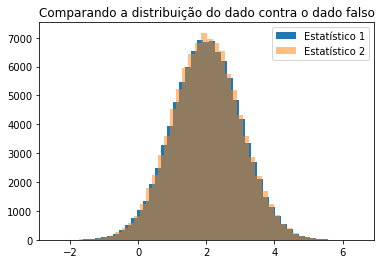

In [33]:
plt.hist(estatistico1[:,0], bins=50, label='Estatístico 1')
plt.hist(estatistico2[:,0], alpha=0.5, bins=50, label='Estatístico 2')
plt.title('Comparando a distribuição do dado contra o dado falso')
plt.legend()
plt.show()

## Ancilaridade

Uma estatística anciliar não depende do parâmetro, então não pode atualizar a informação sobre ele. 
Será que significa que ela pode ser ignorada? 
Vamos verificar isso com um exemplo numérico. Seja $X_1, \dots, X_n \overset{iid}{\sim} \operatorname{Unif}[\theta-1/2, \theta+1/2]$. Assim 
$$
f(x_1, \dots, x_n | \theta) = \prod_{i=1}^n 1\{\theta -1/2 < x_i < \theta+1/2\} = 1\{\theta - 1/2 < \min\{x_i\}\}1\{\theta + 1/2 > \max\{x_i\}\}
$$
Portanto $T(X) = (\min(X_i), \max(X_i))$ é estatística suficiente mínima.
Seja $U(X) = \max(X_i) - \min(X_i)$.
Vamos verificar que $U$ é estatística anciliar 

Defina $Y_i = X_i - \theta + 1/2 \sim \operatorname{Uniform}(0,1)$. Assim, 
$$
U = \max(X_i) - \min(X_i) = \max(X_i-\theta+1/2) - \min(X_i-\theta+1/2) = \max(Y_i) - \min(Y_i).
$$
Como a distribuição de $Y$ independe de $\theta$, temos que a distribuição de $U$ também independe, o que mostra que $U$ é estatística anciliar.

Vamos visualizar a distribuição de $U$ de duas formas: partindo de $X$ e partido de $Y$.

In [37]:
theta = 5
n = 10

X = np.random.uniform(theta-1/2, theta+1/2, size=(100000, n))
Y = np.random.uniform(size=(100000, n))

# Estamos tomando o máximo de cada linha de X e obtendo 100000 amostras para X.
U1 = X.max(axis=1) - X.min(axis=1)
U2 = Y.max(axis=1) - Y.min(axis=1)

Note que de fato as distribuições são muito similares.

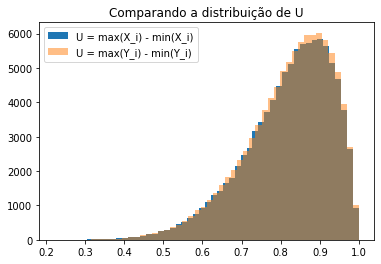

In [39]:
plt.hist(U1,  bins=50, label='U = max(X_i) - min(X_i)')
plt.hist(U2, alpha=0.5, bins=50, label='U = max(Y_i) - min(Y_i)')
plt.title('Comparando a distribuição de U')
plt.legend()
plt.show()

Se observamos que $U(X) = u$, podemos calcular que $\max(x_i) | U = u \sim \operatorname{Unif}(\theta-1/2+u, \theta+1/2)$. 
Assim, a distribuição de uma estatística muda com outra anciliar.